In [1]:
# Predikce cen nemovitostí - lineární regrese 

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("train_nem.csv")

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df["Id"].unique()

array([   1,    2,    3, ..., 1458, 1459, 1460], dtype=int64)

In [9]:
df = df.drop("Id", axis = 1)

In [10]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [11]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())

In [12]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690


In [13]:
df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [14]:
df = df.drop("Alley", axis = 1)

In [15]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690
GarageType,81


In [16]:
df["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [17]:
df["MasVnrArea"].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [18]:
df[df["MasVnrType"].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,69.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,69.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [19]:
df[df["MasVnrArea"].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,69.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,69.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [20]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [21]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [22]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [23]:
df_bsmt = df[['BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']]
df_bsmt

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
0,Gd,TA,No,GLQ,706,Unf
1,Gd,TA,Gd,ALQ,978,Unf
2,Gd,TA,Mn,GLQ,486,Unf
3,TA,Gd,No,ALQ,216,Unf
4,Gd,TA,Av,GLQ,655,Unf
...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,0,Unf
1456,Gd,TA,No,ALQ,790,Rec
1457,TA,Gd,No,GLQ,275,Unf
1458,TA,TA,Mn,GLQ,49,Rec


In [24]:
df_bsmt = df_bsmt.loc[df["BsmtQual"].isna()]
df_bsmt

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
17,NaN,NaN,NaN,NaN,0,NaN
39,NaN,NaN,NaN,NaN,0,NaN
90,NaN,NaN,NaN,NaN,0,NaN
102,NaN,NaN,NaN,NaN,0,NaN
156,NaN,NaN,NaN,NaN,0,NaN
182,NaN,NaN,NaN,NaN,0,NaN
259,NaN,NaN,NaN,NaN,0,NaN
342,NaN,NaN,NaN,NaN,0,NaN
362,NaN,NaN,NaN,NaN,0,NaN
371,NaN,NaN,NaN,NaN,0,NaN


In [25]:
df[['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']] = df[['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']].fillna("NA")

In [26]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
Electrical,1
FireplaceQu,690
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81
PoolQC,1453
Fence,1179
MiscFeature,1406


In [27]:
electrical = df.loc[df["Electrical"].isna()]
electrical["YearBuilt"]

1379    2006
Name: YearBuilt, dtype: int64

In [28]:
same_year = df[df["YearBuilt"] == 2006]
same_year["Electrical"].unique()

array(['SBrkr', nan], dtype=object)

In [29]:
df["Electrical"] = df["Electrical"].fillna("SBrkr")

In [30]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
FireplaceQu,690
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81
PoolQC,1453
Fence,1179
MiscFeature,1406


In [31]:
fireplace = df[df["FireplaceQu"].isna()]
fireplace["Fireplaces"].unique()

array([0], dtype=int64)

In [32]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("NA")

In [33]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81
PoolQC,1453
Fence,1179
MiscFeature,1406


In [34]:
garage = df[df["GarageType"].isna()]
garage[["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [35]:
df[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]] = df[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]].fillna("NA")

In [36]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

In [37]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
PoolQC,1453
Fence,1179
MiscFeature,1406


In [38]:
df[["PoolQC", "PoolArea"]]

,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
1455,NaN,0
1456,NaN,0
1457,NaN,0
1458,NaN,0


In [39]:
df[df["PoolArea"] > 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,60,RL,80.0,16692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,80,RL,69.0,19690,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [40]:
df["PoolQC"] = df["PoolQC"].fillna("NA")

In [41]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
Fence,1179
MiscFeature,1406


In [42]:
df = df.drop("MiscFeature", axis = 1)

In [43]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0
Fence,1179


In [44]:
df = df.drop("Fence", axis = 1)

In [45]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.loc[df_null[0] != 0]
df_null

,0


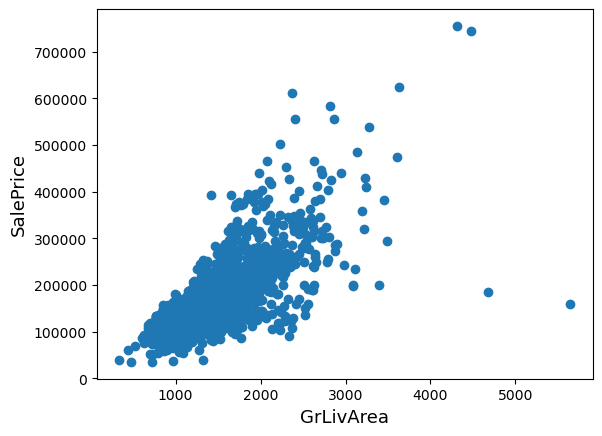

In [46]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df["SalePrice"])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [47]:
df = df.drop(df[(df['GrLivArea']>4500) & (df['SalePrice']<300000)].index)

display(df.shape)

(1458, 77)

In [48]:
df['MSSubClass']=df['MSSubClass'].astype('object')
df['YearBuilt']=df['YearBuilt'].astype('object')
df['YearRemodAdd']=df['YearRemodAdd'].astype('object')
df['MoSold']=df['MoSold'].astype('object')
df['YrSold']=df['YrSold'].astype('object')
df['MasVnrArea']=df['MasVnrArea'].astype('float64')
df['GarageYrBlt']=df['GarageYrBlt'].astype('object')

In [49]:
y = df['SalePrice']
x = df.drop('SalePrice',axis=1,inplace=True)

num_cols = [f for f in df.columns if df.dtypes[f] != 'object']
cat_cols = [f for f in df.columns if df.dtypes[f] == 'object']

In [50]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1458 non-null   float64
 1   LotArea        1458 non-null   int64  
 2   OverallQual    1458 non-null   int64  
 3   OverallCond    1458 non-null   int64  
 4   MasVnrArea     1458 non-null   float64
 5   BsmtFinSF1     1458 non-null   int64  
 6   BsmtFinSF2     1458 non-null   int64  
 7   BsmtUnfSF      1458 non-null   int64  
 8   TotalBsmtSF    1458 non-null   int64  
 9   1stFlrSF       1458 non-null   int64  
 10  2ndFlrSF       1458 non-null   int64  
 11  LowQualFinSF   1458 non-null   int64  
 12  GrLivArea      1458 non-null   int64  
 13  BsmtFullBath   1458 non-null   int64  
 14  BsmtHalfBath   1458 non-null   int64  
 15  FullBath       1458 non-null   int64  
 16  HalfBath       1458 non-null   int64  
 17  BedroomAbvGr   1458 non-null   int64  
 18  KitchenA

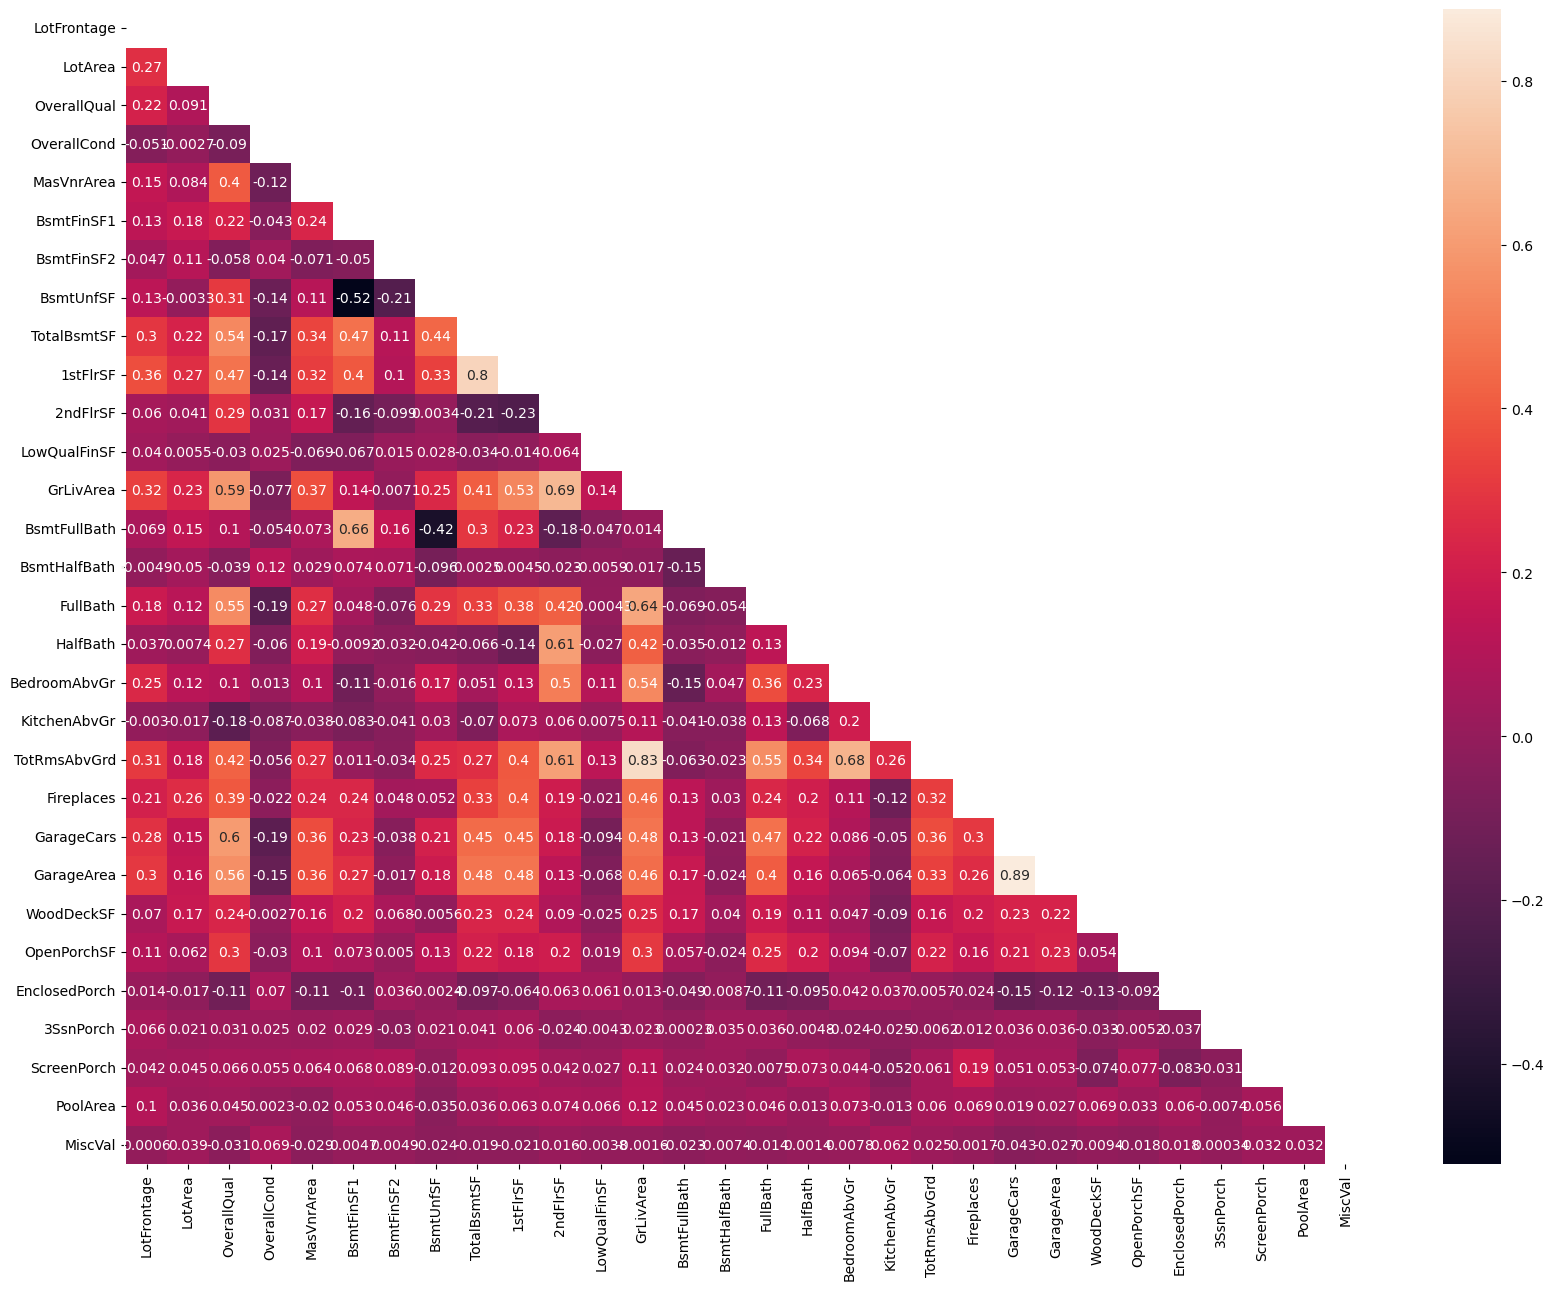

In [51]:
plt.figure(figsize = (20,15))
matrix=np.triu((df[num_cols]).corr())
sns.heatmap((df[num_cols]).corr(),annot=True,mask=matrix) 
plt.show()

In [52]:
df = df.drop("TotRmsAbvGrd", axis = 1)
df = df.drop("1stFlrSF", axis = 1)
df = df.drop("GarageCars", axis = 1)

df = df.drop("BsmtFinSF1", axis = 1)
df = df.drop("BsmtFinSF2", axis = 1)
df = df.drop("BsmtUnfSF", axis = 1)

df = df.drop("GarageYrBlt", axis = 1)

In [53]:
num_cols = [f for f in df.columns if df.dtypes[f] != 'object']
cat_cols = [f for f in df.columns if df.dtypes[f] == 'object']

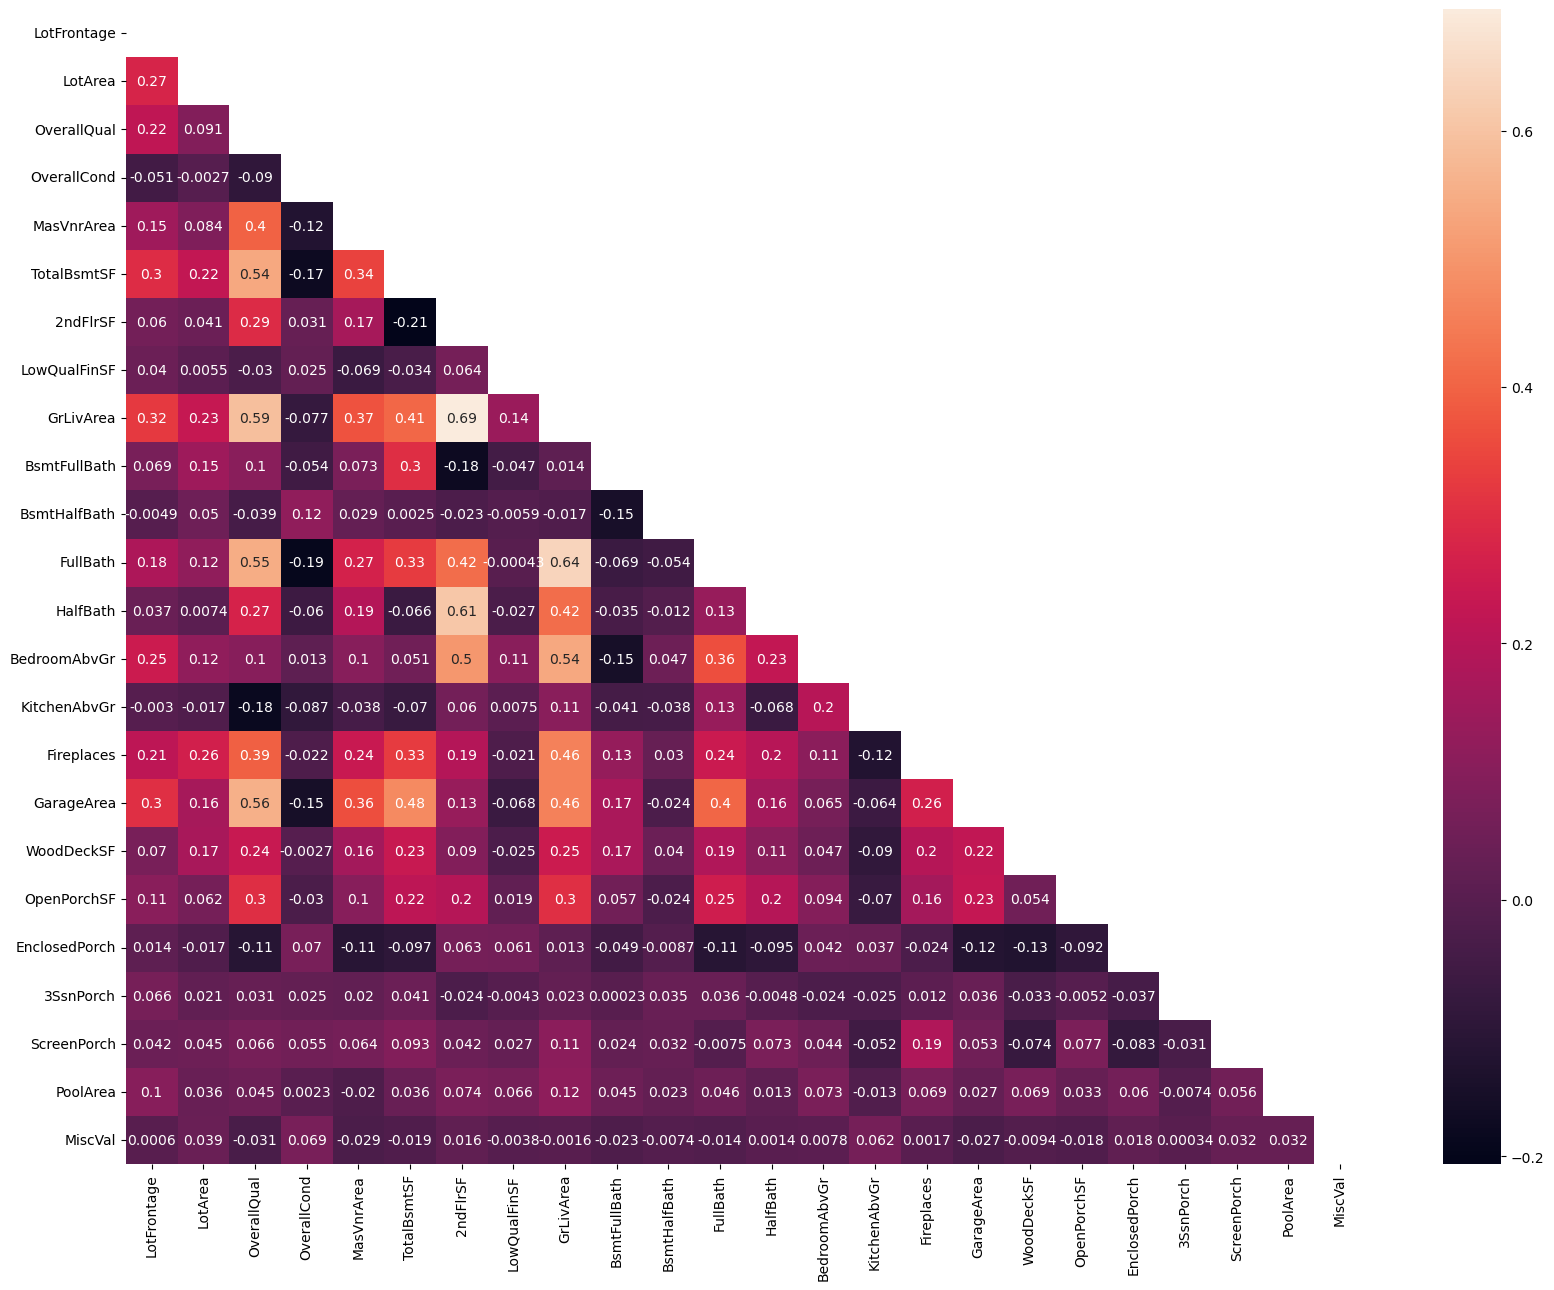

In [54]:
plt.figure(figsize = (20,15))
matrix=np.triu((df[num_cols]).corr())
sns.heatmap((df[num_cols]).corr(),annot=True,mask=matrix) 
plt.show()

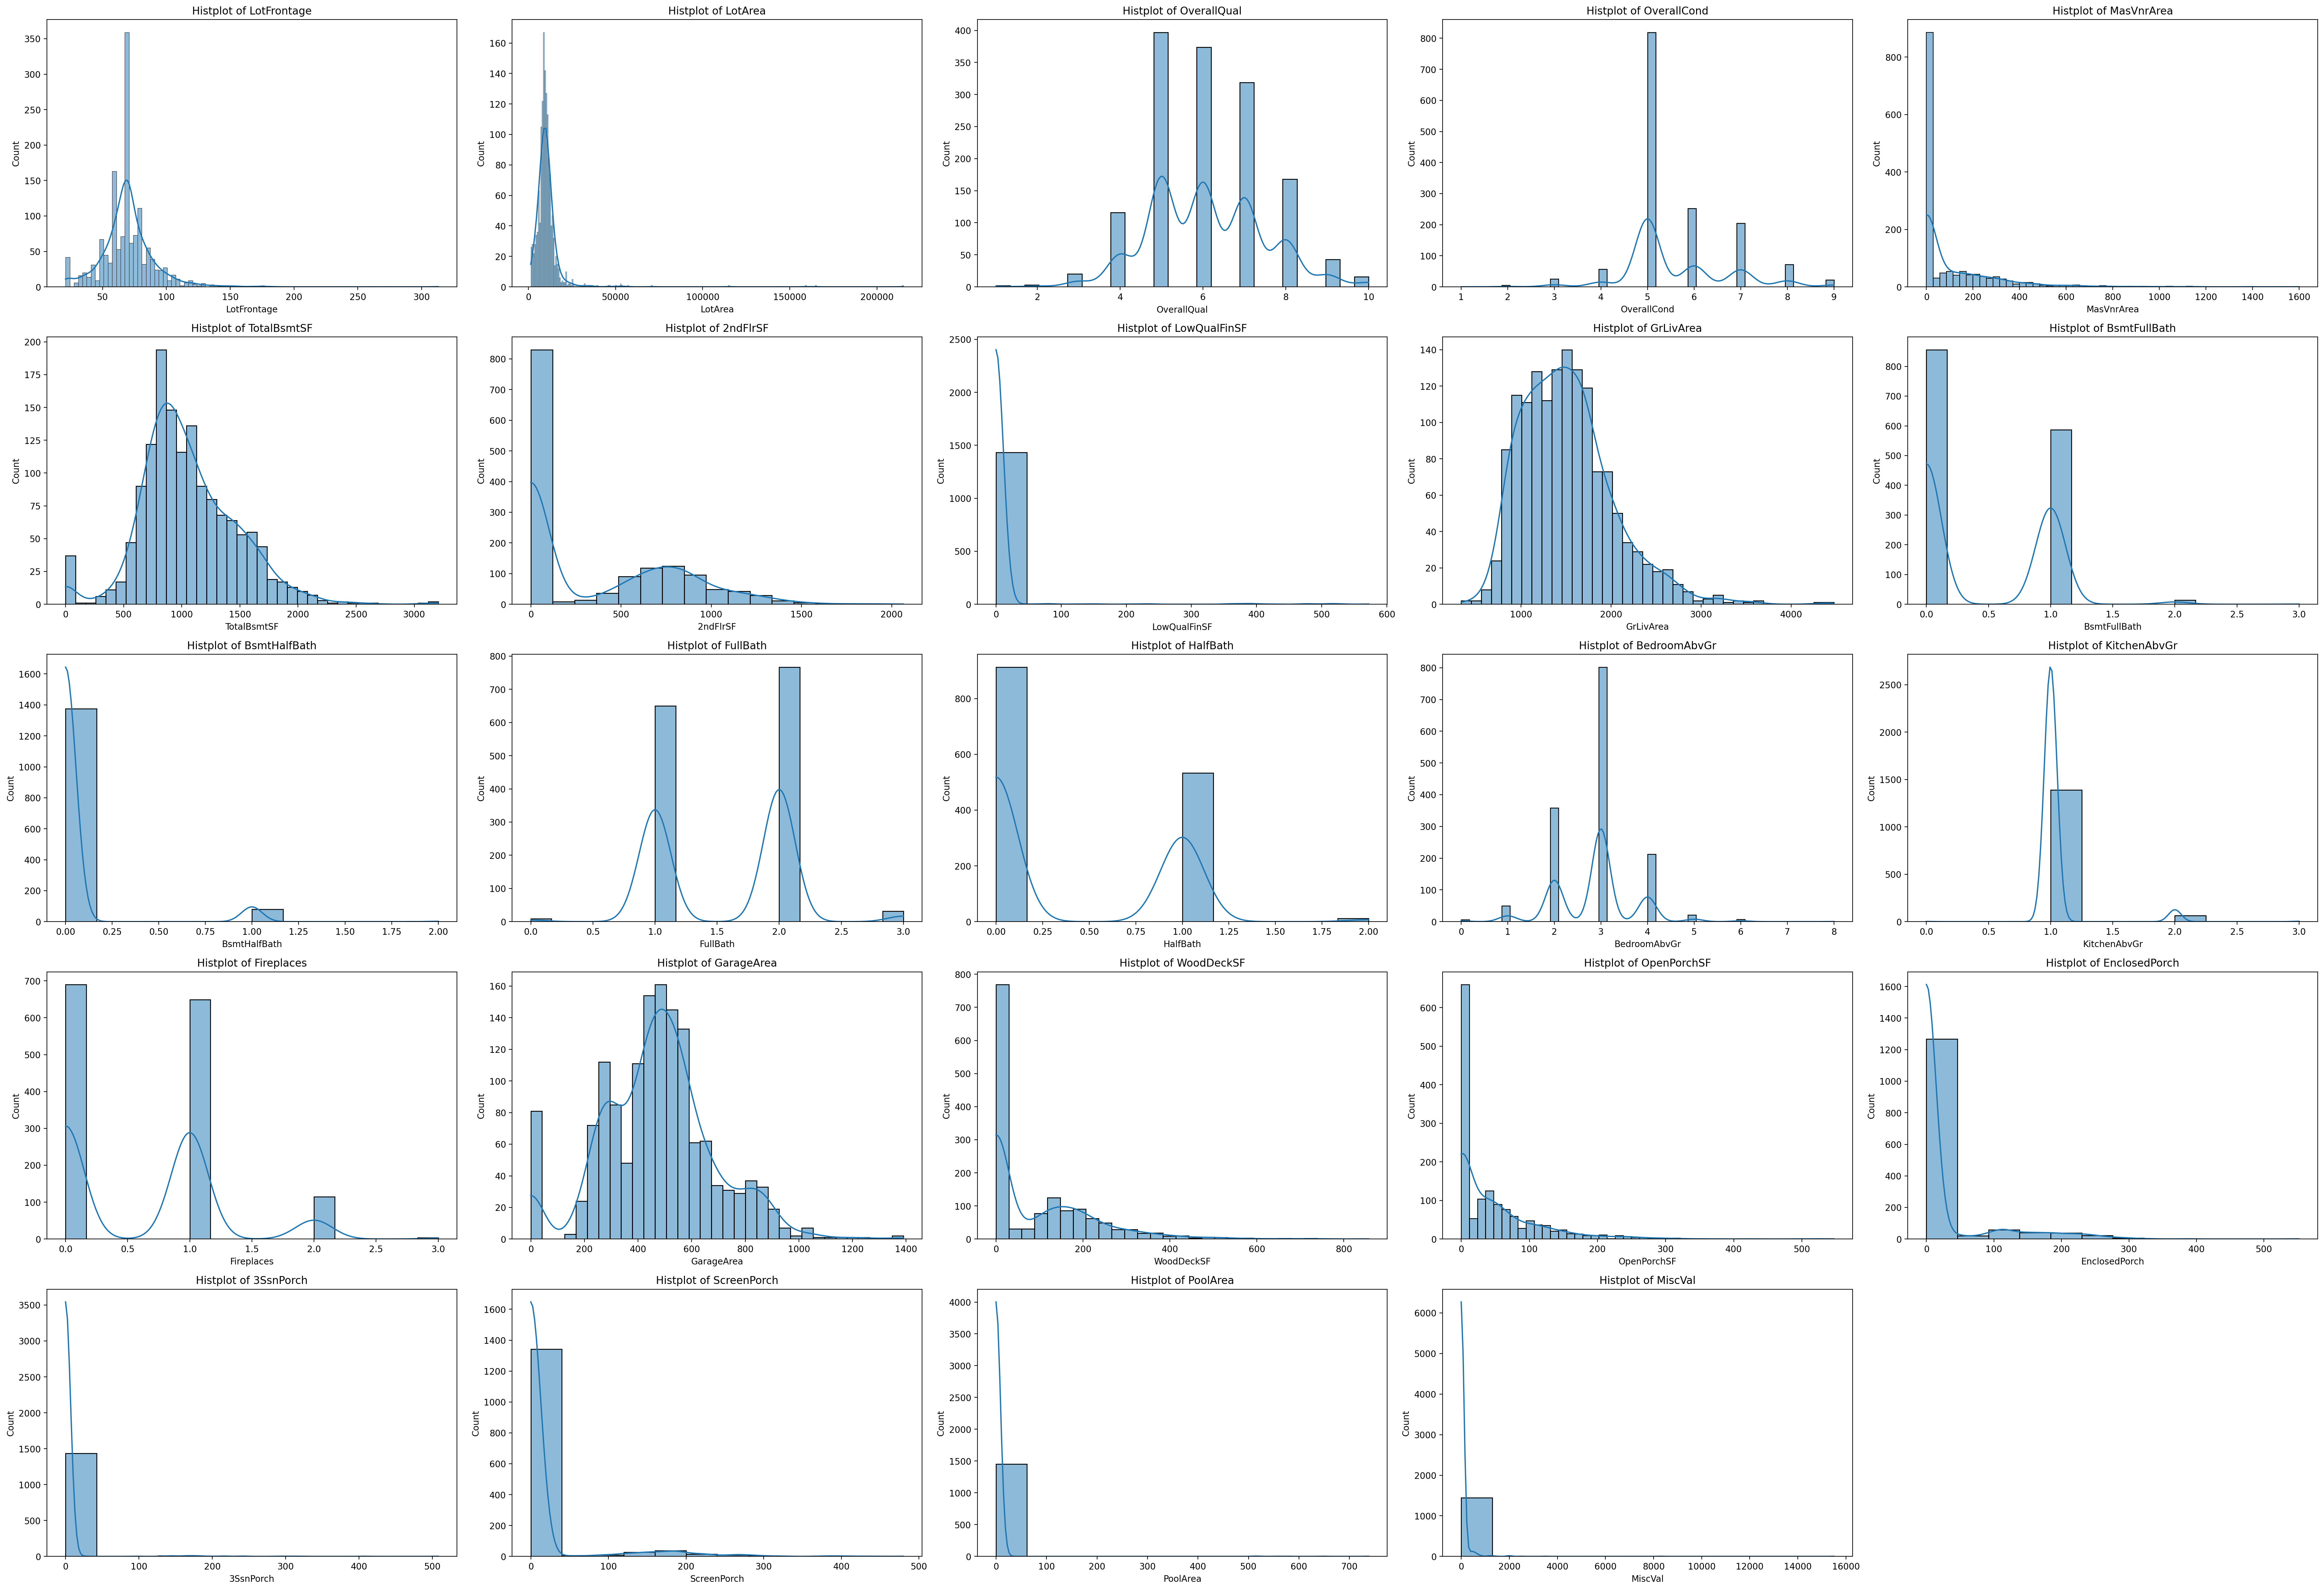

In [55]:
plt.figure(figsize = (37,35), dpi = 200)

for i in range(len(num_cols)):
    plt.subplot(7, 5, i + 1)
    sns.histplot(data= df,x = df[num_cols[i]],kde=True)
    plt.title('Histplot of {}'.format(num_cols[i]))
    plt.tight_layout()

In [56]:
from scipy.stats import kurtosis, skew

skewness = skew(df[num_cols])
skewness = pd.Series(skewness)
skewness

0      1.719086
1     12.560986
2      0.200579
3      0.690324
4      2.693554
5      0.511177
6      0.812121
7      8.995688
8      1.009951
9      0.589751
10     4.095895
11     0.031239
12     0.679351
13     0.212107
14     4.480268
15     0.631409
16     0.131612
17     1.544214
18     2.337421
19     3.083987
20    10.286510
21     4.114690
22    15.932532
23    24.434913
dtype: float64

In [57]:
columns_name = pd.Series(df[num_cols].columns)
columns_name
skewness_name = pd.concat([columns_name, skewness], axis = 1)
skewness_name.columns = ["Feature", "Skewness_score"]
skewness_name

,Feature,Skewness_score
0,LotFrontage,1.719086
1,LotArea,12.560986
2,OverallQual,0.200579
3,OverallCond,0.690324
4,MasVnrArea,2.693554
5,TotalBsmtSF,0.511177
6,2ndFlrSF,0.812121
7,LowQualFinSF,8.995688
8,GrLivArea,1.009951
9,BsmtFullBath,0.589751


In [58]:
skewness_name = skewness_name[(skewness_name["Skewness_score"] > 0.5)]
skewness_name

,Feature,Skewness_score
0,LotFrontage,1.719086
1,LotArea,12.560986
3,OverallCond,0.690324
4,MasVnrArea,2.693554
5,TotalBsmtSF,0.511177
6,2ndFlrSF,0.812121
7,LowQualFinSF,8.995688
8,GrLivArea,1.009951
9,BsmtFullBath,0.589751
10,BsmtHalfBath,4.095895


In [59]:
skewness_name["Feature"].unique()

array(['LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], dtype=object)

In [60]:
col_log = ['LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [61]:
df_log = df.copy(deep = True)

def log_transform(x):
    df_log[x] = np.log(df_log[x].values+1)
    
for x in col_log:
    log_transform(x)

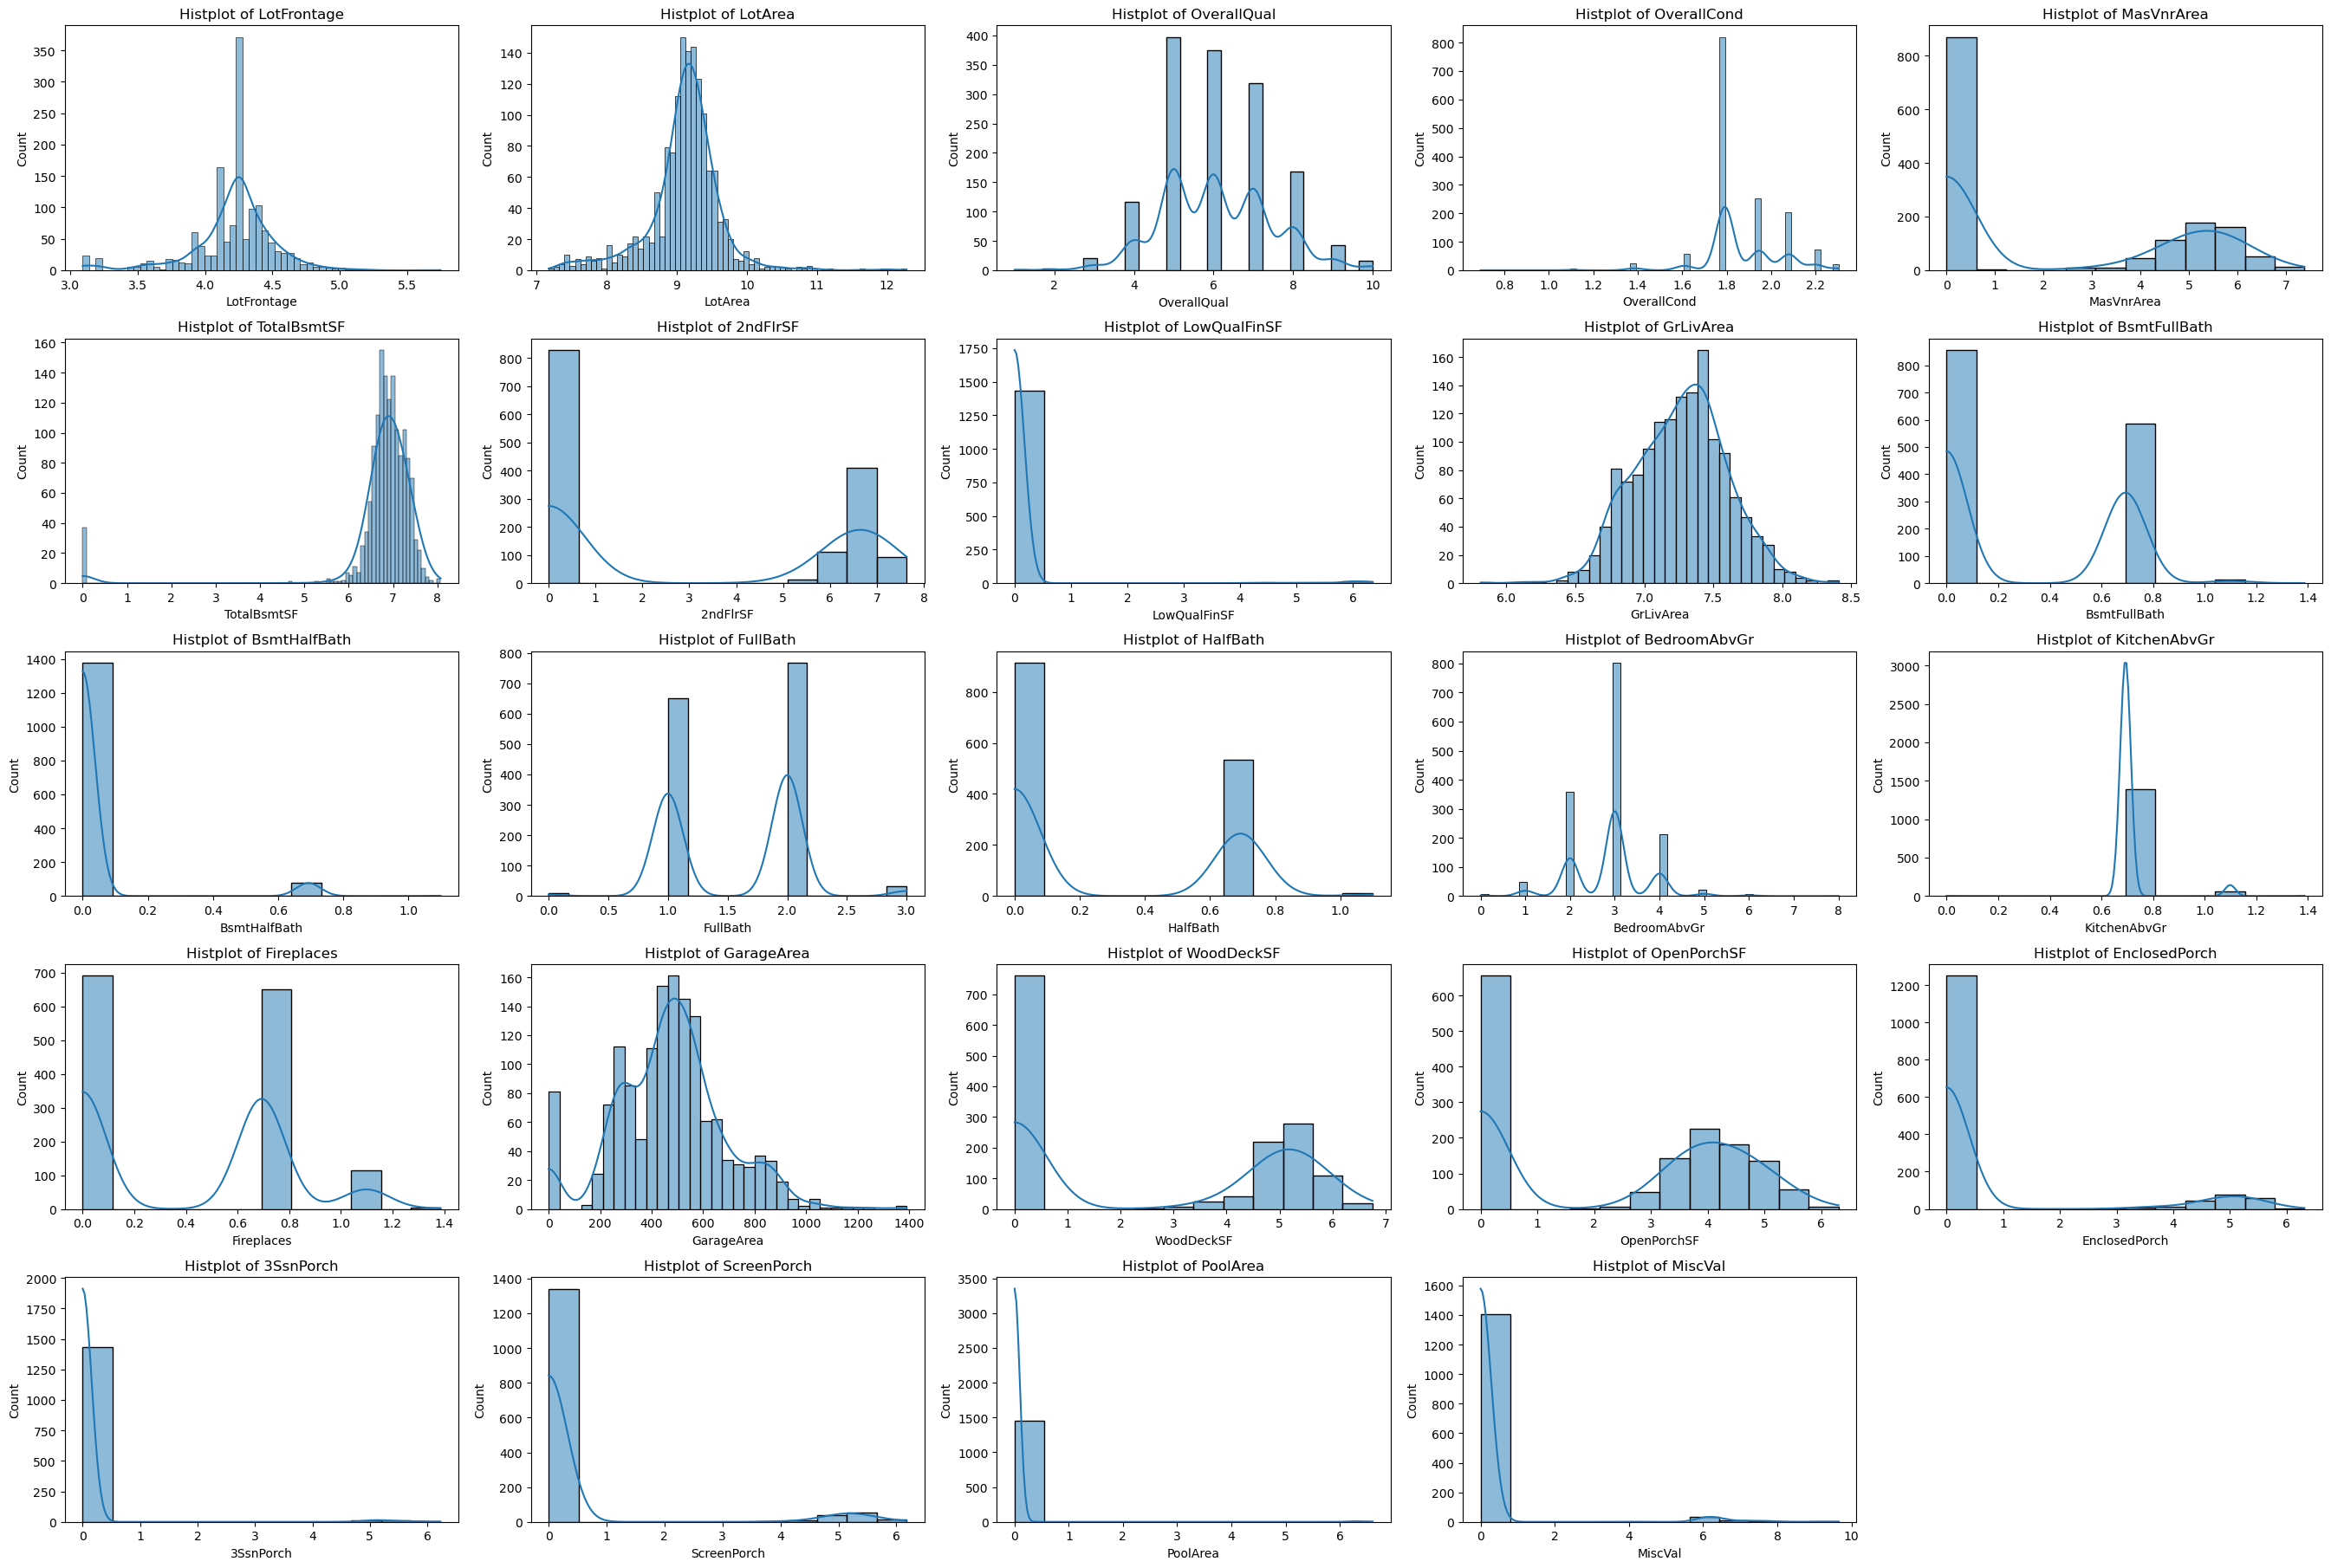

In [62]:
plt.figure(figsize = (27,25))

for i in range(len(num_cols)):
    plt.subplot(7, 5, i + 1)
    sns.histplot(data= df_log,x = df_log[num_cols[i]],kde=True)
    plt.title('Histplot of {}'.format(num_cols[i]))
    plt.tight_layout()

In [63]:
skewness = skew(df_log[num_cols])
skewness = pd.Series(skewness)
skewness

0     -0.968554
1     -0.181091
2      0.200579
3     -0.255451
4      0.505791
5     -5.166992
6      0.292482
7      7.447271
8     -0.070939
9      0.418978
10     3.925827
11     0.031239
12     0.569489
13     0.212107
14     3.862290
15     0.178679
16     0.131612
17     0.156353
18    -0.022866
19     2.107795
20     7.721468
21     3.144400
22    15.501716
23     5.161462
dtype: float64

In [64]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [65]:
df_log_dummies = pd.get_dummies(df_log, columns=['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                                               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                                                'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
                                                'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                                "BsmtFinType1", 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                                                'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                                'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MoSold',
                                                'YrSold', 'SaleType', 'SaleCondition'], drop_first = True)

dummies = df_log_dummies.columns.tolist()

C:\Users\blizk\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [66]:
df_log_dummies.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,5.283204,6.753438,6.751101,0.0,7.444833,0.693147,...,0,0,0,0,1,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,0.000000,7.141245,0.000000,0.0,7.141245,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,5.093750,6.825460,6.765039,0.0,7.488294,0.693147,...,0,0,0,0,1,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,0.000000,6.629363,6.629363,0.0,7.448916,0.693147,...,0,0,0,0,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,5.860786,7.044033,6.960348,0.0,7.695758,0.693147,...,0,0,0,0,1,0,0,0,1,0


In [67]:
df_log_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Columns: 436 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(20), int64(4), uint8(412)
memory usage: 903.7 KB


In [68]:
y_log = np.log(y.values)

y_log.shape

(1458,)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
y = y_log
X = df_log_dummies.copy(deep = True)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
regression_model = LinearRegression()

In [74]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [75]:
regression_model.coef_

array([ 5.43989307e-02,  7.80030721e-02,  2.81191024e-02,  2.49562840e-01,
       -2.21991573e-03,  1.01965103e-01,  7.87187257e-03,  5.18900934e-03,
        3.79396228e-01,  7.33824512e-02,  2.03275140e-02,  4.55343057e-02,
        4.20601141e-02, -7.13792370e-04, -6.31028656e-02,  8.73225155e-02,
        1.43085625e-04,  5.34862184e-03,  1.25738131e-03,  2.82803636e-03,
        4.54876482e-03,  7.10982910e-03, -8.60580763e-03, -1.26402666e-03,
       -3.37247798e-02, -2.18306569e-02, -9.00086621e-02, -1.04170600e-01,
       -1.71640004e-02,  1.10164921e-02, -2.43629840e-02, -8.99092856e-02,
       -3.51826285e-02, -3.33404338e-02, -2.53462007e-02, -7.62353540e-02,
        7.49659766e-02,  8.44378004e-02,  3.64253916e-01,  2.78309152e-01,
        2.88341244e-01,  2.45488340e-01,  9.27795510e-02,  2.02299643e-02,
        3.07065181e-02,  1.06719650e-02, -5.80621569e-02, -6.18976562e-02,
       -5.83685635e-02, -9.74421843e-02,  3.83499744e-02, -4.90742582e-02,
       -1.26005912e-01, -

In [76]:
regression_model.score(X_train, y_train)

0.9634717759984236

In [77]:
import sklearn.metrics as metrics

In [78]:
y_train_predict_log = regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, y_train_predict_log))

0.07668030781699589

In [79]:
y_pred = regression_model.predict(X_test)

In [80]:
regression_model.score(X_test, y_test)

0.8670725118346448

In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [82]:
 mean_absolute_error(y_test,y_pred)

0.10075238145131608

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.1444635035193233